## Philosophy: if your goal is to learn: don't use AI to write code!

Just like letting a machine lift weights doesn't help you do push-ups.

## You can, however, use AI to teach you to write code.

#### Suggested procedure:

(1) Find code.  Find some code you want to understand.

(2) Effort.  Make an effort to understand it.  See how much you can do.  Like doing push-ups - don't stop when it's easy; stop when it's hard.

(3) AI.  Ask TerrierGPT to explain it to you.

## terriergpt.bu.edu

(4) Vocabulary.  Make sure you understand the technical terms it uses.

(5) Motivation. Make sure you find out why it matters.

## Two hard steps:

* Step (2).  Getting yourself to do as many push-ups as you can (making it hard for yourself.)  You have to figure out how to do this.  Perhaps you can try writing freely about the code, putting down your thoughts in a paragraph or two.

* Step (4).  Knowing the technical terms / concepts.  My job is to teach you this.

In [1]:
from functools import partial
from statistics import mean, pstdev

data = [1,2,2,3,3,3,4,4,5]
zscore = partial(lambda x, mu, sigma: (x - mu) / sigma if sigma else 0, mu=mean(data), sigma=pstdev(data))
print([round(zscore(x), 2) for x in data])

[-1.73, -0.87, -0.87, 0.0, 0.0, 0.0, 0.87, 0.87, 1.73]


## My "push-ups" (step 2)

Why not just write lambda x: (x - mean(data)) / pstdev(data) if pstdev(data) else 0?

Is it just to avoid writing pstdev(data) twice?  To make clear that these are mu and sigma?

Is partial a function that takes arguments and passes them to the function that is its first argument?

And why pstdev rather than stdev?

## Technical terms (step 4)

Lambda

Z score

Population standard deviation vs. sample deviation

# Univariate Analysis

## How to process one column of data at a time

# Learning Objectives

## Motivation: Why will we use this in real life?

Why do we use:

* Mean, median, mode, standard deviation, variance
* Histograms
* KDE plots

## Definitions: What do the words mean?

Mean, Median, Mode​ - supporting terms: expected value, pdf, pmf, cdf

Standard deviation, variance​ - supporting terms: expected value, L2 norm, covariance

Quantiles​ - CDF, inverse CDF, order statistics

Range

Histograms​ - PDF, bin width, normalization

Bar charts: plt.bar( … ) or df.bar( … )​ - error bars, linear vs. log axis, nominal vs. ordinal variables

Stacked bar chart​ - stacked counts vs. stacked proportions

Kernel density plots: sns.histplot( … kde = True)​ - kernel function, bandwidth (smoothing parameter), bias-variance tradeoff

Swarm: sns.swarmplot( … )​ - jittering, point aggregation / overplotting, categorical axis / grouping variable

Violin: sns.violinplot( … )​ - area proportional vs. max width scaling

Box plot: sns.boxplot( … ) or df.boxplot( … )​ - interquartile range, five number summary, whisker rule

Segmented univariate analysis (e.g. violin or swarm)

## Vocabulary / concepts prepares you for step (4).  That's irreplaceable.

* Once you understand definitions, you can read TerrierGPT information about how the code works
* I will provide questions that I suggest you ask TerrierGPT.

## Mean, Median, Mode​ - supporting terms: expected value, pdf, pmf, cdf

In [2]:
[1, 2, 4, 5, 5] 
mean = (1 + 2 + 4 + 5 + 5) / 5
median = 4
mode = 5

## Definitions

1. Mean: the sum of the column divided by its length
2. Median: the middle value of the column, if the column were listed in increasing order.
3. Mode: the value that appears most in the column.  Good for categorical data.  (A, B, C not 1.146, 2.890, 3.275)
4. PDF: Probability Density Function.  A theoretical probability distribution (that probably does not exactly match your data, but it may be close.)  The area under a segment is the probability of being in that segment.
5. CDF: Cumulative Density Function.  A probability distribution in another form.  The value at a point is the probability of being less than that point.
6. PMF: Probability Mass Function.  A probability at a point equals the value of the PMF at that point.  Points are discrete (categorical).

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# -------------------------
# 1) Simple list: mean, median, (empirical) mode
# -------------------------
data = [1, 2, 2, 3, 4]  # small list for hand calculation
mean_val = np.mean(data)
median_val = np.median(data)
# empirical mode (most frequent value). scipy.stats.mode is ok but returns array; do simple:
(unique, counts) = np.unique(data, return_counts=True)
mode_val = unique[np.argmax(counts)]

print("List:", data)
print("Mean:", mean_val)
print("Median:", median_val)
print("Mode (empirical):", mode_val)

List: [1, 2, 2, 3, 4]
Mean: 2.4
Median: 2.0
Mode (empirical): 2


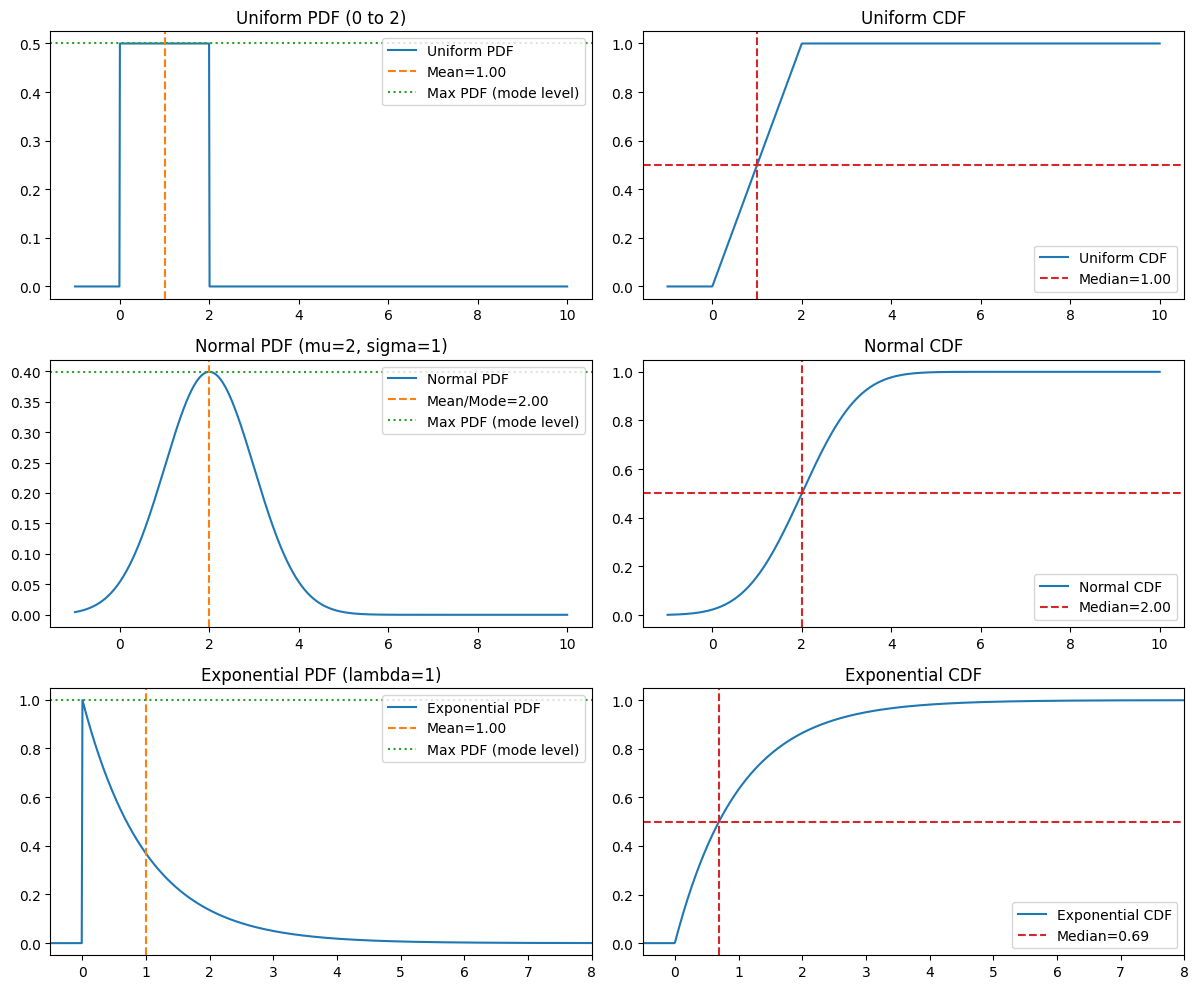

In [4]:
# -------------------------
# 2) Define three continuous distributions
# -------------------------
rng = np.random.default_rng(0)
x = np.linspace(-1, 10, 1000)

# Uniform on [0,2]
a, b = 0.0, 2.0
pdf_uniform = stats.uniform.pdf(x, loc=a, scale=(b - a))
cdf_uniform = stats.uniform.cdf(x, loc=a, scale=(b - a))
mean_uniform = (a + b) / 2.0  # expected value of uniform

# Normal N(2, 1^2)
mu, sigma = 2.0, 1.0
pdf_normal = stats.norm.pdf(x, loc=mu, scale=sigma)
cdf_normal = stats.norm.cdf(x, loc=mu, scale=sigma)
mean_normal = mu  # expected value of normal
mode_normal = mu  # symmetric unimodal

# Exponential with rate lambda=1 (shifted to start at 0)
lam = 1.0
pdf_exp = stats.expon.pdf(x, scale=1/lam)  # starts at x=0
cdf_exp = stats.expon.cdf(x, scale=1/lam)
mean_exp = 1/lam  # expected value of exponential
mode_exp = 0.0    # mode of exponential is at 0

# -------------------------
# 3) Plot pdfs and mark means/modes
# -------------------------
fig, axes = plt.subplots(3, 2, figsize=(12, 10))
ax_pdf_u, ax_cdf_u = axes[0]
ax_pdf_n, ax_cdf_n = axes[1]
ax_pdf_e, ax_cdf_e = axes[2]

# PDF Uniform
ax_pdf_u.plot(x, pdf_uniform, label='Uniform PDF', color='C0')
ax_pdf_u.axvline(mean_uniform, color='C1', linestyle='--', label=f'Mean={mean_uniform:.2f}')
# mode for uniform: any value in [a,b] is a mode; mark the center (same as mean here)
ax_pdf_u.axhline(np.max(pdf_uniform), color='C2', linestyle=':', label='Max PDF (mode level)')
ax_pdf_u.set_title('Uniform PDF (0 to 2)')
ax_pdf_u.legend(loc='upper right')

# CDF Uniform, median is 0.5 -> x such that CDF=0.5 is median
ax_cdf_u.plot(x, cdf_uniform, color='C0', label='Uniform CDF')
median_uniform = stats.uniform.ppf(0.5, loc=a, scale=(b - a))
ax_cdf_u.axhline(0.5, color='C3', linestyle='--')
ax_cdf_u.axvline(median_uniform, color='C3', linestyle='--', label=f'Median={median_uniform:.2f}')
ax_cdf_u.set_title('Uniform CDF')
ax_cdf_u.legend(loc='lower right')

# PDF Normal
ax_pdf_n.plot(x, pdf_normal, label='Normal PDF', color='C0')
ax_pdf_n.axvline(mean_normal, color='C1', linestyle='--', label=f'Mean/Mode={mean_normal:.2f}')
# mark mode (max of pdf)
mode_idx = np.argmax(pdf_normal)
ax_pdf_n.axhline(pdf_normal[mode_idx], color='C2', linestyle=':', label='Max PDF (mode level)')
ax_pdf_n.set_title('Normal PDF (mu=2, sigma=1)')
ax_pdf_n.legend(loc='upper right')

# CDF Normal
ax_cdf_n.plot(x, cdf_normal, color='C0', label='Normal CDF')
median_normal = stats.norm.ppf(0.5, loc=mu, scale=sigma)  # = mu
ax_cdf_n.axhline(0.5, color='C3', linestyle='--')
ax_cdf_n.axvline(median_normal, color='C3', linestyle='--', label=f'Median={median_normal:.2f}')
ax_cdf_n.set_title('Normal CDF')
ax_cdf_n.legend(loc='lower right')

# PDF Exponential
ax_pdf_e.plot(x, pdf_exp, label='Exponential PDF', color='C0')
ax_pdf_e.axvline(mean_exp, color='C1', linestyle='--', label=f'Mean={mean_exp:.2f}')
ax_pdf_e.axhline(np.max(pdf_exp), color='C2', linestyle=':', label='Max PDF (mode level)')
ax_pdf_e.set_xlim(-0.5, 8)
ax_pdf_e.set_title('Exponential PDF (lambda=1)')
ax_pdf_e.legend(loc='upper right')

# CDF Exponential
ax_cdf_e.plot(x, cdf_exp, color='C0', label='Exponential CDF')
median_exp = stats.expon.ppf(0.5, scale=1/lam)
ax_cdf_e.axhline(0.5, color='C3', linestyle='--')
ax_cdf_e.axvline(median_exp, color='C3', linestyle='--', label=f'Median={median_exp:.2f}')
ax_cdf_e.set_xlim(-0.5, 8)
ax_cdf_e.set_title('Exponential CDF')
ax_cdf_e.legend(loc='lower right')

plt.tight_layout()

## Purpose of showing PDF / CDF

* Illustrate mean, median, and mode

## Why we use mean, median, and mode

1. Median is more robust to outliers.  An outlier changes the mean a lot, but the median only a little.
2. If the mean and median are very different, it may indicate outliers or skew.  Outliers can cause problems for some models, e.g. linear regression.  Look at the histogram to see what's going on.
3. You can check if the data make sense (e.g. a mean human height of 10 meters would indicate a problem.)

### TerrierGPT questions

Suggestion: state your background and preferences.  "I know calculus / don't know calculus."  "Please explain it very simply, then give a higher level explanations."  "Please give me code to draw a graph using matplotlib."

1. What is a probability density function (pdf)?
2. Given a pdf for X, how do I compute the probability that X is between 1 and 2?
3. What is a cumulative density function (cdf)?
4. Given a cdf for X, how do I compute the probability that X is between 1 and 2?
5. When would I use the mean vs. median vs. mode of a column in data science?

## Definition

1. Histogram: Each bar's height represents the count of points in that region.  If density = True, each bar's area represents the fraction or probability that a point will be in that region.

## Practical histogram code

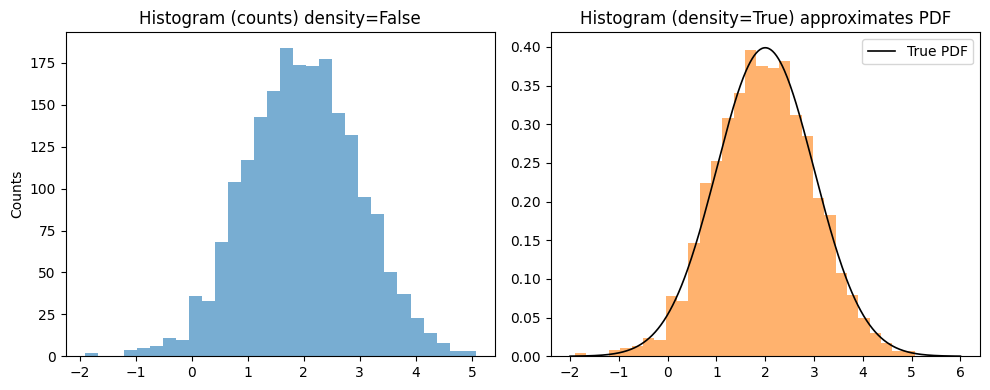

In [5]:

# -------------------------
# 4) Histograms: density=True vs False (counts)
# -------------------------
fig2, ax2 = plt.subplots(1, 2, figsize=(10, 4))
# sample many points from normal
samples = rng.normal(loc=mu, scale=sigma, size=2000)

ax2[0].hist(samples, bins=30, density=False, color='C0', alpha=0.6)
ax2[0].set_title('Histogram (counts) density=False')
ax2[0].set_ylabel('Counts')

ax2[1].hist(samples, bins=30, density=True, color='C1', alpha=0.6)
# overlay the true pdf
xs = np.linspace(-2, 6, 400)
ax2[1].plot(xs, stats.norm.pdf(xs, loc=mu, scale=sigma), color='k', lw=1.2, label='True PDF')
ax2[1].set_title('Histogram (density=True) approximates PDF')
ax2[1].legend()

plt.tight_layout()

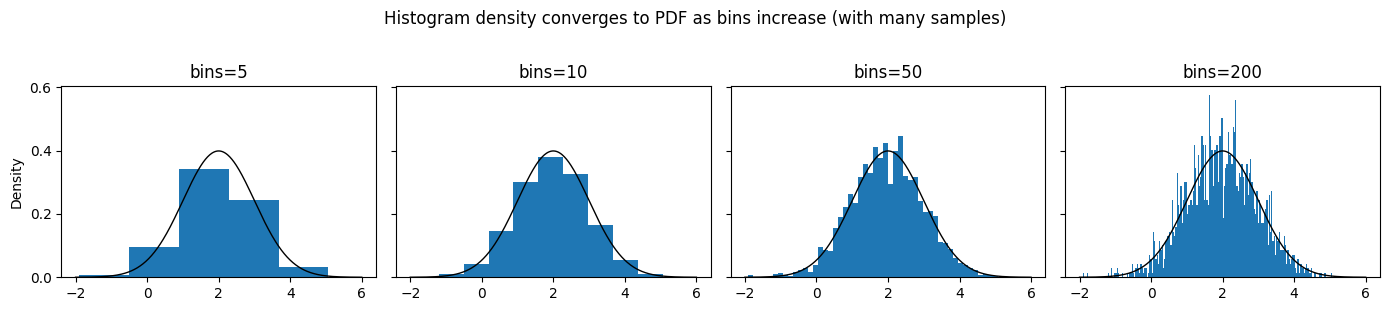

In [6]:
# -------------------------
# 5) Sequence of histograms with shrinking bins (shows approach to pdf)
# -------------------------
fig3, axs3 = plt.subplots(1, 4, figsize=(14, 3), sharey=True)
bin_sets = [5, 10, 50, 200]
for ax, nb in zip(axs3, bin_sets):
    ax.hist(samples, bins=nb, density=True, color='C0', alpha=1)
    ax.plot(xs, stats.norm.pdf(xs, loc=mu, scale=sigma), color='k', lw=1)
    ax.set_title(f'bins={nb}')
axs3[0].set_ylabel('Density')
plt.suptitle('Histogram density converges to PDF as bins increase (with many samples)', y=1.02)
plt.tight_layout()

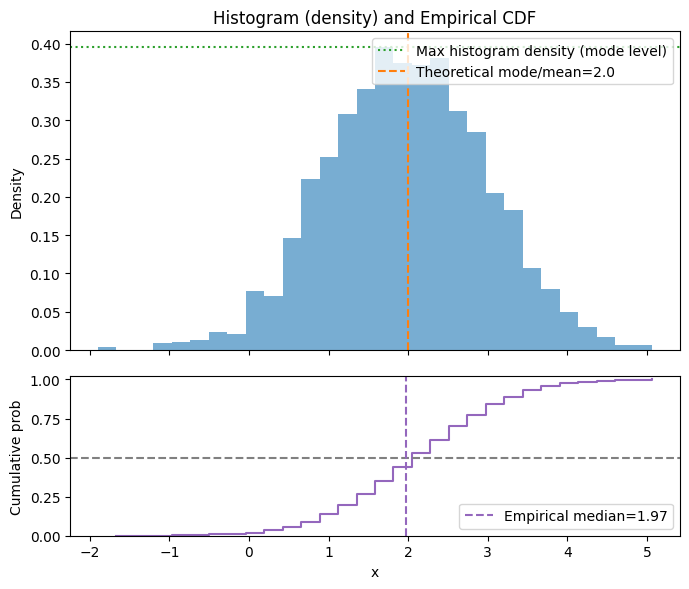

In [7]:
fig, (ax_hist, ax_cum) = plt.subplots(2, 1, figsize=(7, 6), sharex=True,
                                       gridspec_kw={'height_ratios': [2, 1]})

# density histogram + PDF + mode line
n, bins, patches = ax_hist.hist(samples, bins=30, density=True, color='C0', alpha=0.6)
#ax_hist.plot(xs, stats.norm.pdf(xs, loc=mu, scale=sigma), color='k', lw=1)
max_density = np.max(n)
ax_hist.axhline(max_density, color='C2', linestyle=':', label='Max histogram density (mode level)')
ax_hist.axvline(mu, color='C1', linestyle='--', label=f'Theoretical mode/mean={mu}')
ax_hist.set_ylabel('Density')
ax_hist.legend(loc='upper right')
ax_hist.set_title('Histogram (density) and Empirical CDF')

# cumulative histogram (empirical CDF) as step
counts_cum, bins_cum = np.histogram(samples, bins=bins, density=False)
cum_prob = np.cumsum(counts_cum) / counts_cum.sum()
ax_cum.step(bins_cum[1:], cum_prob, where='post', color='C4', lw=1.5)
ax_cum.set_ylabel('Cumulative prob')
ax_cum.set_xlabel('x')
ax_cum.set_ylim(0, 1.02)
# mark median where cumulative crosses 0.5
median_emp = np.median(samples)
ax_cum.axhline(0.5, color='gray', linestyle='--')
ax_cum.axvline(median_emp, color='C4', linestyle='--', label=f'Empirical median={median_emp:.2f}')
ax_cum.legend(loc='lower right')

plt.tight_layout()

In [8]:

# -------------------------
# 7) Print computed expected values, medians, modes for distributions
# -------------------------
print("\nDistribution summary (theoretical):")
print(f"Uniform U[{a},{b}]: mean={mean_uniform:.3f}, median={median_uniform:.3f}, mode=any in [{a},{b}]")
print(f"Normal N({mu},{sigma**2}): mean={mean_normal:.3f}, median={median_normal:.3f}, mode={mode_normal:.3f}")
print(f"Exponential (lambda={lam}): mean={mean_exp:.3f}, median={median_exp:.3f}, mode={mode_exp:.3f}")

plt.show()


Distribution summary (theoretical):
Uniform U[0.0,2.0]: mean=1.000, median=1.000, mode=any in [0.0,2.0]
Normal N(2.0,1.0): mean=2.000, median=2.000, mode=2.000
Exponential (lambda=1.0): mean=1.000, median=0.693, mode=0.000


### TerrierGPT questions

1. Why are normal distributions so important?
2. If my data are normal, what data science models can I run on it that I maybe couldn't if it wasn't normal?

## Standard deviation, variance


## Definitions

1. Standard deviation: Measures the breadth of the data (how much does it vary?)
2. Variance: Also measures the breadth, but in squared units: if the breadth doubles, the variance quadruples.

In [9]:
import numpy as np

# Tiny data you can verify by hand
tiny = np.array([1.0, 2.0, 4.0, 5.0, 8.0])
N = len(tiny)

# 1) Sum and mean
sum_tiny = tiny.sum()               # 1 + 2 + 4 + 5 + 8 = 20
mean_tiny = sum_tiny / N            # 20 / 5 = 4.0

print("Values:", tiny.tolist())
print(f"Sum = {int(sum_tiny)}  (1 + 2 + 4 + 5 + 8)")
print(f"Mean = sum / N = {sum_tiny} / {N} = {mean_tiny}")

# 2) Deviations and squared deviations
deviations = tiny - mean_tiny
squared_devs = deviations ** 2
sum_squared_devs = squared_devs.sum()

print("\nDeviations from mean:")
for x, d, sd in zip(tiny, deviations, squared_devs):
    print(f"  {x} - {mean_tiny} = {d:.1f}   -> squared = {sd:.1f}")

print(f"Sum of squared deviations = {sum_squared_devs:.1f}")

# 3) Population variance (divide by N)
var_pop = sum_squared_devs / N
std_pop = np.sqrt(var_pop)
print(f"\nPopulation variance (divide by N): var = {sum_squared_devs:.1f} / {N} = {var_pop:.3f}")
print(f"Population std dev = sqrt(var) = {std_pop:.3f}")

# 4) Sample variance (divide by N-1)
var_sample = sum_squared_devs / (N - 1)
std_sample = np.sqrt(var_sample)
print(f"\nSample variance (divide by N-1): s^2 = {sum_squared_devs:.1f} / {N-1} = {var_sample:.3f}")
print(f"Sample std dev = sqrt(s^2) = {std_sample:.3f}")

# For reassurance, compare to numpy built-ins
print("\nNumPy checks:")
print(" np.var(tiny, ddof=0) =", np.var(tiny, ddof=0))   # population variance
print(" np.var(tiny, ddof=1) =", np.var(tiny, ddof=1))   # sample variance

Values: [1.0, 2.0, 4.0, 5.0, 8.0]
Sum = 20  (1 + 2 + 4 + 5 + 8)
Mean = sum / N = 20.0 / 5 = 4.0

Deviations from mean:
  1.0 - 4.0 = -3.0   -> squared = 9.0
  2.0 - 4.0 = -2.0   -> squared = 4.0
  4.0 - 4.0 = 0.0   -> squared = 0.0
  5.0 - 4.0 = 1.0   -> squared = 1.0
  8.0 - 4.0 = 4.0   -> squared = 16.0
Sum of squared deviations = 30.0

Population variance (divide by N): var = 30.0 / 5 = 6.000
Population std dev = sqrt(var) = 2.449

Sample variance (divide by N-1): s^2 = 30.0 / 4 = 7.500
Sample std dev = sqrt(s^2) = 2.739

NumPy checks:
 np.var(tiny, ddof=0) = 6.0
 np.var(tiny, ddof=1) = 7.5


In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon, uniform, norm, mode
from sklearn.datasets import load_iris

# -------------------------------
# 1. Exponential distribution: manual variance and standard deviation
# -------------------------------

# Parameter for exponential distribution
lambda_param = 0.5  # rate parameter
mean_exp = 1 / lambda_param  # expected value E[X] = 1/lambda
variance_exp = 1 / (lambda_param ** 2)  # Var(X) = 1/lambda^2
std_dev_exp = np.sqrt(variance_exp)     # sigma = sqrt(Var)

print("Exponential Distribution (manual calculations):")
print(f"Expected value (mean): {mean_exp:.2f}")
print(f"Variance: {variance_exp:.2f}")
print(f"Standard deviation: {std_dev_exp:.2f}")
print()

Exponential Distribution (manual calculations):
Expected value (mean): 2.00
Variance: 4.00
Standard deviation: 2.00



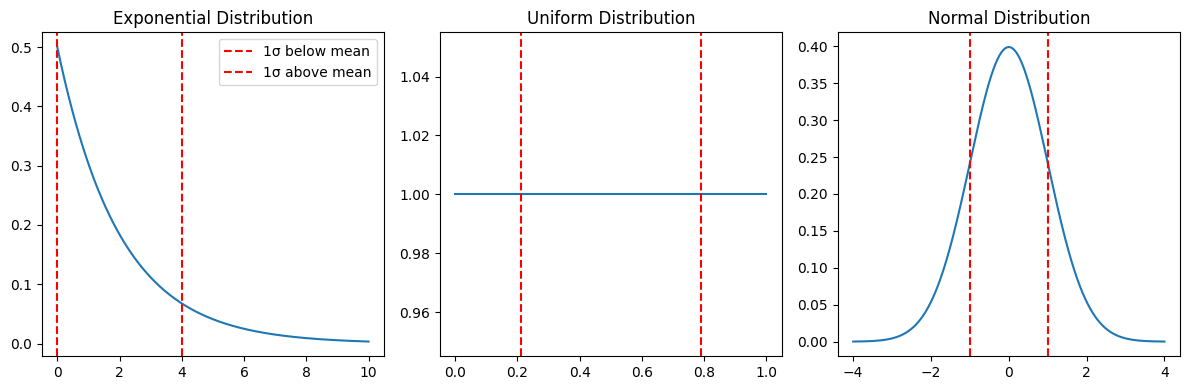

In [11]:
# -------------------------------
# 3. Plot distributions with ±1 sigma
# -------------------------------

x_exp = np.linspace(0, 10, 500)
x_uniform = np.linspace(0, 1, 500)
x_norm = np.linspace(-4, 4, 500)

plt.figure(figsize=(12, 4))

# Exponential
plt.subplot(1, 3, 1)
plt.plot(x_exp, stats.expon.pdf(x_exp, scale=mean_exp))
plt.axvline(mean_exp - std_dev_exp, color='r', linestyle='--', label='1σ below mean')
plt.axvline(mean_exp + std_dev_exp, color='r', linestyle='--', label='1σ above mean')
plt.title("Exponential Distribution")
plt.legend()

# Uniform
plt.subplot(1, 3, 2)
plt.plot(x_uniform, uniform.pdf(x_uniform, 0, 1))
uniform_std = np.sqrt(1/12)  # σ^2 = (b-a)^2/12
plt.axvline(0.5 - uniform_std, color='r', linestyle='--')
plt.axvline(0.5 + uniform_std, color='r', linestyle='--')
plt.title("Uniform Distribution")

# Normal
plt.subplot(1, 3, 3)
plt.plot(x_norm, norm.pdf(x_norm, 0, 1))
plt.axvline(0 - 1, color='r', linestyle='--')
plt.axvline(0 + 1, color='r', linestyle='--')
plt.title("Normal Distribution")

plt.tight_layout()
plt.show()

In [12]:
# -------------------------------
# 4. Load default dataset and compute stats
# -------------------------------

# Use Iris dataset (readily available in sklearn)
iris = load_iris()
data = iris.data
feature_names = iris.feature_names

print("Dataset Statistics (Iris features):")
for i, feature in enumerate(feature_names):
    column = data[:, i]
    mean_val = np.mean(column)
    median_val = np.median(column)
    mode_val = mode(column).mode
    sample_std = np.std(column, ddof=1)
    sample_var = np.var(column, ddof=1)
    
    print(f"\nFeature: {feature}")
    print(f"  Mean: {mean_val:.2f}")
    print(f"  Median: {median_val:.2f}")
    print(f"  Mode: {mode_val:.2f}")
    print(f"  Sample Std Dev: {sample_std:.2f}")
    print(f"  Sample Variance: {sample_var:.2f}")

Dataset Statistics (Iris features):

Feature: sepal length (cm)
  Mean: 5.84
  Median: 5.80
  Mode: 5.00
  Sample Std Dev: 0.83
  Sample Variance: 0.69

Feature: sepal width (cm)
  Mean: 3.06
  Median: 3.00
  Mode: 3.00
  Sample Std Dev: 0.44
  Sample Variance: 0.19

Feature: petal length (cm)
  Mean: 3.76
  Median: 4.35
  Mode: 1.40
  Sample Std Dev: 1.77
  Sample Variance: 3.12

Feature: petal width (cm)
  Mean: 1.20
  Median: 1.30
  Mode: 0.20
  Sample Std Dev: 0.76
  Sample Variance: 0.58


## Why do we use standard deviation and variance

1. If standard deviation is small relative to the mean, the column might not be useful for prediction.  (Especially if it's not correlated with the target.)
2. A good model has a Mean Squared Error or L2 loss that is small compared with its target's variance (hence a large R**2).

### TerrierGPT questions

1. Derive, using LaTeX, the fact that the expected value of (x - mean)\**2, which is the definition of the variance, is equal to E(x**2) - E(x)**2
2. Why would I compute the standard deviation or variance of a column in data science?

## Quantiles​ - CDF, inverse CDF

## Definitions

1. Quantile: like a percentile.  (The 80th percentile person has a score above 80 percent of the group).
2. Inverse CDF: Plots the percentile or quantile vs. the value.  It is the CDF but visually flipped 45 degrees.

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Simple list (11 items) and sample quantiles
vals = np.array([2, 3, 5, 6, 7, 8, 9, 11, 12, 14, 20])
vals_sorted = np.sort(vals)
n = len(vals_sorted)
print("Sorted values (order statistics):", vals_sorted)
median_pos = (n + 1) / 2
median = vals_sorted[int(median_pos) - 1]  # exact middle for odd n
print("Median (middle element):", median)

Sorted values (order statistics): [ 2  3  5  6  7  8  9 11 12 14 20]
Median (middle element): 8


In [14]:
# example 90th percentile using p*(n+1) interpolation
p = 0.9
rank = p * (n - 1)
k = int(np.floor(rank))
frac = rank - k
if k <= 0:
    q90 = vals_sorted[0]
elif k >= n:
    q90 = vals_sorted[-1]
else:
    q90 = vals_sorted[k] + frac * (vals_sorted[k + 1] - vals_sorted[k])
print(f"90th percentile (p*(n+1) interpolation) ~ {q90:.3f} (rank={rank:.3f})")

90th percentile (p*(n+1) interpolation) ~ 14.000 (rank=9.000)


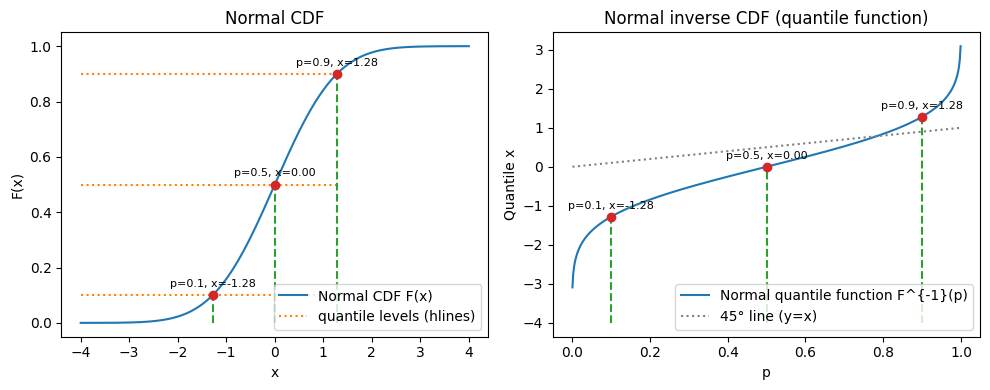

In [15]:
# --- Normal CDF and inverse CDF plots ---
mu, sigma = 0.0, 1.0
xs = np.linspace(-4, 4, 500)
ps = np.linspace(0.001, 0.999, 500)

cdf_vals = stats.norm.cdf(xs, loc=mu, scale=sigma)
inv_cdf_vals = stats.norm.ppf(ps, loc=mu, scale=sigma)

# Quantiles to mark
quantile_ps = [0.1, 0.5, 0.9]
quantile_xs = stats.norm.ppf(quantile_ps, loc=mu, scale=sigma)

fig, axes = plt.subplots(1, 2, figsize=(10, 4))


# Left: CDF F(x)
ax = axes[0]
ax.plot(xs, cdf_vals, label='Normal CDF F(x)')
ax.hlines(quantile_ps, xmin=xs[0], xmax=quantile_xs[-1], colors='C1', linestyles='dotted', label='quantile levels (hlines)')
for p_val, x_val in zip(quantile_ps, quantile_xs):
    ax.vlines(x_val, ymin=0, ymax=p_val, colors='C2', linestyles='--')
    ax.plot(x_val, p_val, 'o', color='C3')
    ax.text(x_val, p_val + 0.03, f'p={p_val}, x={x_val:.2f}', ha='center', fontsize=8)
ax.set_xlabel('x')
ax.set_ylabel('F(x)')
ax.set_title('Normal CDF')
ax.set_ylim(-0.05, 1.05)
ax.legend(loc='lower right')

# Right: Inverse CDF (quantile function) F^{-1}(p)
ax = axes[1]
ax.plot(ps, inv_cdf_vals, label='Normal quantile function F^{-1}(p)')
# 45 degree line to show mirror symmetry (plot p vs p)
ax.plot(ps, ps, color='gray', linestyle=':', label='45° line (y=x)')
for p_val in quantile_ps:
    x_val = stats.norm.ppf(p_val, loc=mu, scale=sigma)
    ax.vlines(p_val, ymin=xs[0], ymax=x_val, colors='C2', linestyles='--')
    ax.plot(p_val, x_val, 'o', color='C3')
    ax.text(p_val, x_val + 0.2, f'p={p_val}, x={x_val:.2f}', ha='center', fontsize=8)
ax.set_xlabel('p')
ax.set_ylabel('Quantile x')
ax.set_title('Normal inverse CDF (quantile function)')
ax.legend(loc='lower right')

plt.tight_layout()
plt.show()

## More histograms

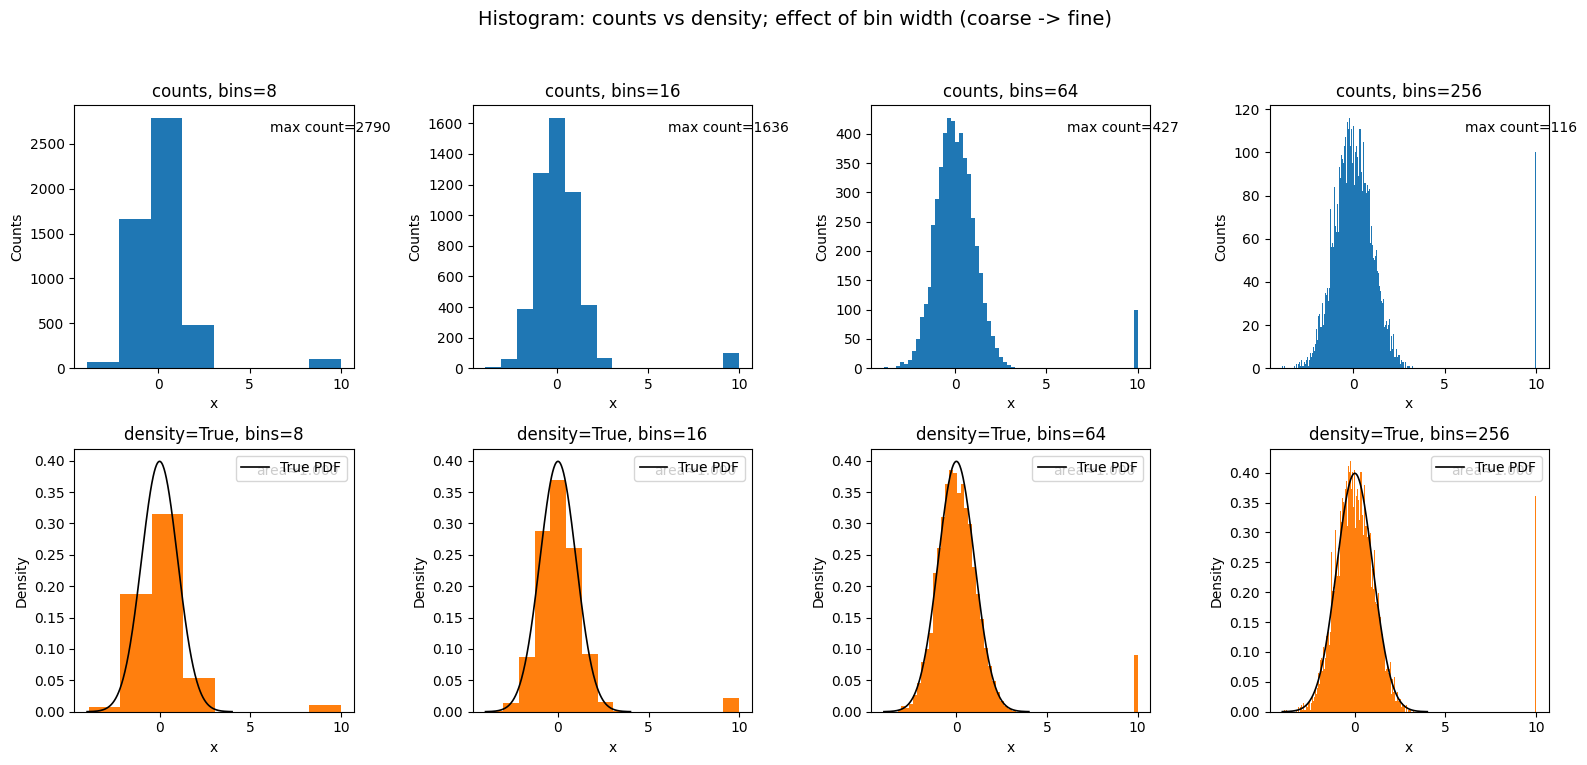

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

rng = np.random.default_rng(0)
mu, sigma = 0.0, 1.0
samples = rng.normal(loc=mu, scale=sigma, size=5000)
samples = np.append(samples, [10] * 100)
xs = np.linspace(-4, 4, 400)
true_pdf = stats.norm.pdf(xs, loc=mu, scale=sigma)

fig, axes = plt.subplots(2, 4, figsize=(16, 8))
bin_choices = [8, 16, 64, 256]  # coarse -> fine

# Top row: density=False (counts). Bottom row: density=True (area normalized)
for col, bins in enumerate(bin_choices):
    # counts
    ax_counts = axes[0, col]
    counts, edges, patches = ax_counts.hist(samples, bins=bins, density=False, color='C0', alpha=1, edgecolor="none")
    ax_counts.set_title(f'counts, bins={bins}')
    ax_counts.set_xlabel('x')
    ax_counts.set_ylabel('Counts')
    # annotate max bar height to show counts scale
    ax_counts.annotate(f'max count={counts.max():.0f}', xy=(0.7, 0.9), xycoords='axes fraction')

    # density (area normalized)
    ax_density = axes[1, col]
    dens_vals, edges2, patches2 = ax_density.hist(samples, bins=bins, density=True, color='C1', alpha=1, edgecolor="none")
    ax_density.plot(xs, true_pdf, color='k', lw=1.2, label='True PDF')
    ax_density.set_title(f'density=True, bins={bins}')
    ax_density.set_xlabel('x')
    ax_density.set_ylabel('Density')
    ax_density.legend(loc='upper right')
    # annotate area under histogram (should be ~1)
    # approximate area by sum(density * bin_width)
    bin_width = edges2[1] - edges2[0]
    approx_area = dens_vals.sum() * bin_width
    ax_density.annotate(f'area≈{approx_area:.3f}', xy=(0.65, 0.9), xycoords='axes fraction')

plt.suptitle('Histogram: counts vs density; effect of bin width (coarse -> fine)', fontsize=14)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [17]:
import pandas as pd
pd.Series(vals_sorted).quantile(0.9)

14.0

## Why run histograms in EDA?

1. Which model/transform to use:

What you learn: whether the distribution is roughly symmetric, right/left skewed, multimodal, or heavy‑tailed.

Why it matters concretely:

If strongly right‑skewed, consider log transforms before linear regression.

If multimodal, you can try to tell how many clusters or Gaussians could be used to describe the data.

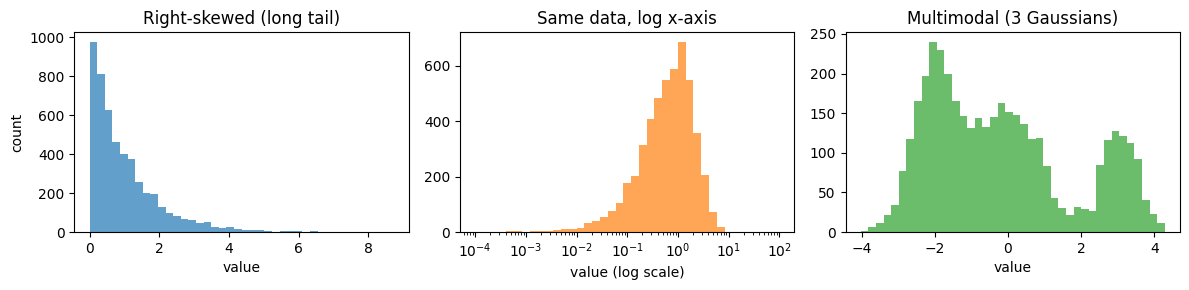

In [18]:
import numpy as np
import matplotlib.pyplot as plt

rng = np.random.default_rng(0)

# 1) Right-skewed data (exponential-like)
skewed = rng.exponential(scale=1.0, size=5000)  # long right tail

# 2) Same data but x on a log scale: add a tiny offset to avoid log(0)
skewed_plus = skewed + 1e-6

# 3) Multimodal data: mixture of three Gaussians (two overlapping)
n = 4000
g1 = rng.normal(loc=-2.0, scale=0.6, size=int(0.4*n))
g2 = rng.normal(loc=0.0,  scale=0.8, size=int(0.4*n))  # overlaps with g1
g3 = rng.normal(loc=3.0,  scale=0.5, size=int(0.2*n))
multi = np.concatenate([g1, g2, g3])

fig, axes = plt.subplots(1, 3, figsize=(12, 3))

# Plot 1: right-skewed histogram
axes[0].hist(skewed, bins=40, color='C0', alpha=0.7)
axes[0].set_xlabel('value')
axes[0].set_ylabel('count')
axes[0].set_title('Right-skewed (long tail)')

# Plot 2: same data with log x-axis
axes[1].hist(skewed_plus, bins=np.logspace(-4, 2, 40), color='C1', alpha=0.7)
axes[1].set_xscale('log')
axes[1].set_xlabel('value (log scale)')
axes[1].set_title('Same data, log x-axis')

# Plot 3: multimodal mixture of Gaussians
axes[2].hist(multi, bins=40, color='C2', alpha=0.7)
axes[2].set_xlabel('value')
axes[2].set_title('Multimodal (3 Gaussians)')

plt.tight_layout()
plt.show()

2. Detect outliers and extreme values - which diagnostics or data decisions to apply

What you learn: isolated large/small values or long tails that summary stats hide.

Why it matters concretely:

Outliers can unduly influence linear regression coefficients.

Extreme values may indicate data errors.

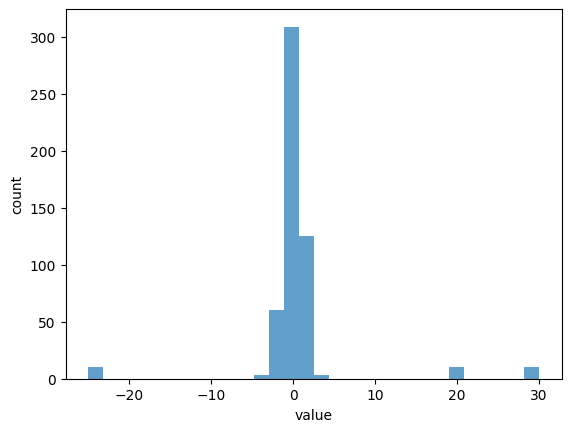

In [19]:
import numpy as np, matplotlib.pyplot as plt

rng = np.random.default_rng(0)
data = np.concatenate([rng.normal(0, 1, 500), np.array([20, 30, -25]).repeat(10)])  # mostly N(0,1) plus 3 extremes
plt.hist(data, bins=30, color='C0', alpha=0.7)
plt.xlabel('value'); plt.ylabel('count')
plt.show()

3. If data are concentrated at a few discrete values, maybe they are best modeled as categorical?

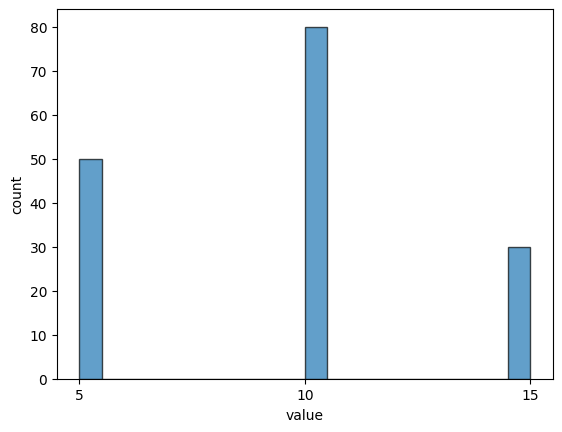

In [20]:
import numpy as np, matplotlib.pyplot as plt

# data concentrated at three exact values
data = np.array([5]*50 + [10]*80 + [15]*30)

# choose bin edges that place one bar centered on each value
#bins = [4.5, 7.5, 12.5, 17.5]  # bins: [4.5-7.5), [7.5-12.5), [12.5-17.5)
plt.hist(data, bins=20, edgecolor='k', alpha=0.7)
plt.xticks([5, 10, 15])
plt.xlabel('value')
plt.ylabel('count')
plt.show()

4. If data are not normal, some models may assume normality.

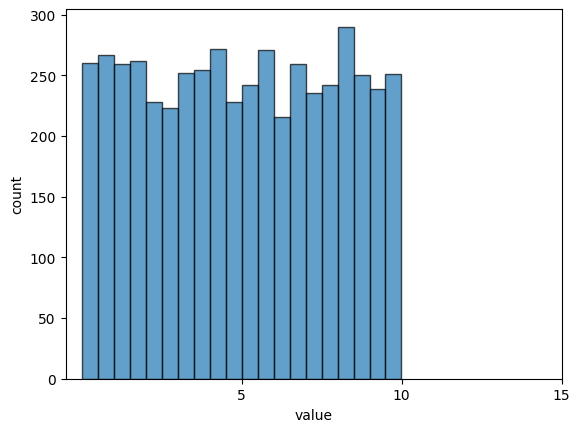

In [21]:
import numpy as np, matplotlib.pyplot as plt

# data concentrated at three exact values
data = np.random.default_rng(0).uniform(0, 10, 5000)

plt.hist(data, bins=20, edgecolor='k', alpha=0.7)
plt.xticks([5, 10, 15])
plt.xlabel('value')
plt.ylabel('count')
plt.show()

5. Choose the right bin number if you are going to show to stakeholder.

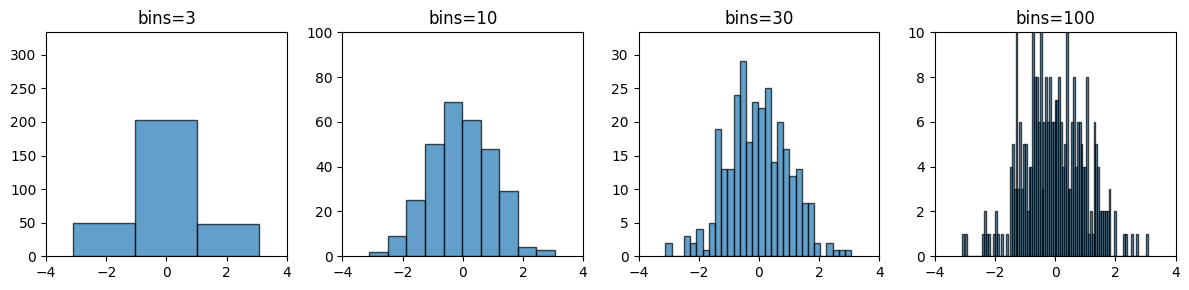

In [22]:
import numpy as np, matplotlib.pyplot as plt

rng = np.random.default_rng(0)
data = rng.normal(loc=0, scale=1, size=300)

fig, axes = plt.subplots(1, 4, figsize=(12, 3))
for ax, nb in zip(axes, [3, 10, 30, 100]):
    ax.hist(data, bins=nb, edgecolor='k', alpha=0.7)
    ax.set_title(f'bins={nb}')
    ax.set_xlim(-4, 4)
    ax.set_ylim(0, 1000 / nb)

plt.tight_layout()
plt.show()

### TerrierGPT question

1. How do I decide how many bins to use in a histogram?

## Bar charts: plt.bar( … ) or df.bar( … )​ - error bars, linear vs. log axis, nominal vs. ordinal variables

## Definitions

1. Bar chart: Like a categorical histogram.  (Shows the count for each category).
2. Error bars: shows how much the bar might vary.
3. Log axis: plots log(x) instead of x
4. Nominal variable: Categories that have no particular order
5. Ordinal variable: Categories that have an order

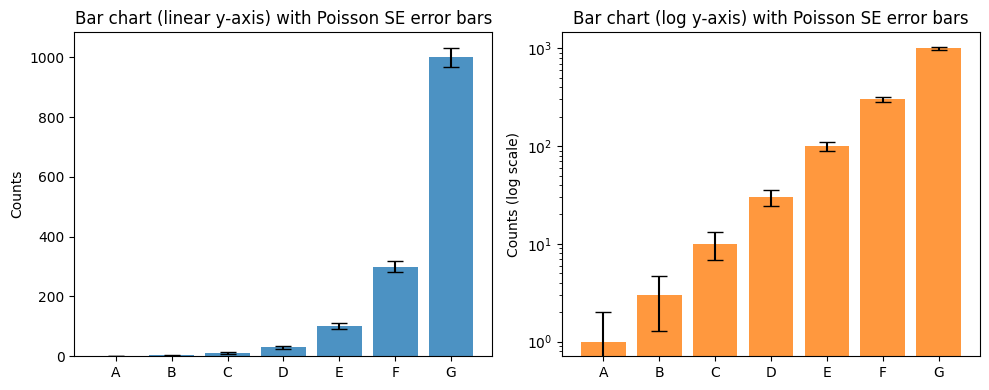

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Helper: Poisson standard error for count n is sqrt(n) (approx). For small n, this is still used frequently.
def poisson_se(counts):
    return np.sqrt(np.array(counts, dtype=float))

# Example 1: Simple integer counts, plt.bar with Poisson error bars
categories = ['A', 'B', 'C', 'D', 'E', 'F', 'G']
counts = np.array([1, 3, 10, 30, 100, 300, 1000])  # integer counts as requested
ses = poisson_se(counts)

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Linear axis
ax = axes[0]
x = np.arange(len(categories))
ax.bar(x, counts, yerr=ses, capsize=6, color='C0', alpha=0.8)
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.set_ylabel('Counts')
ax.set_title('Bar chart (linear y-axis) with Poisson SE error bars')

# Log axis
ax = axes[1]
ax.bar(x, counts, yerr=ses, capsize=6, color='C1', alpha=0.8)
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.set_yscale('log')
ax.set_ylabel('Counts (log scale)')
ax.set_title('Bar chart (log y-axis) with Poisson SE error bars')

plt.tight_layout()

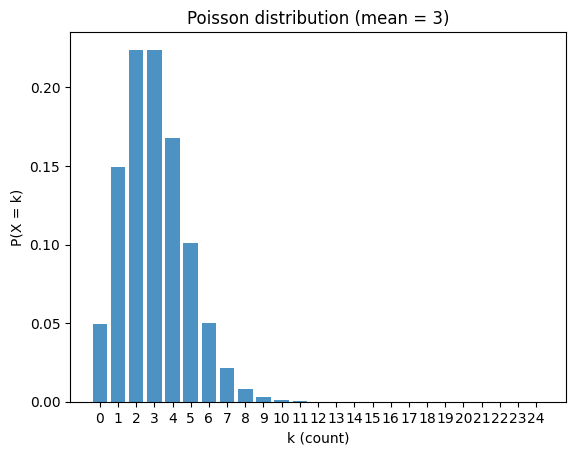

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats  # optional, but convenient for pmf

mu = 3  # mean

# x values (possible counts)
x = np.arange(0, 25)  # 0..24

# PMF values for Poisson(mu)
pmf = stats.poisson.pmf(x, mu)  # using scipy
# alternatively with numpy:
# from math import exp, factorial
# pmf = np.array([np.exp(-mu) * mu**k / factorial(k) for k in x])

# Plot
plt.bar(x, pmf, color='C0', alpha=0.8)
plt.xlabel('k (count)')
plt.ylabel('P(X = k)')
plt.title('Poisson distribution (mean = 3)')
plt.xticks(x)  # show integer ticks
plt.show()

## TerrierGPT questions

1. How do I calculate, approximately, the width of the error bars on a bar in a bar chart?  Assume the bar is Poisson distributed.
2. What does it mean that the bar is Poisson distributed?  Provide matplotlib code that graphs a Poisson distribution.

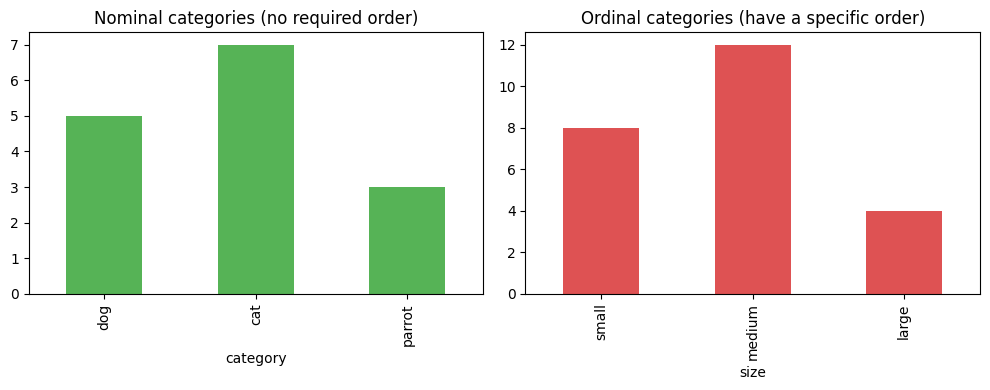

In [25]:
# Note: error bars are plotted in data space; on a log axis matplotlib draws them in log-space,
# which can make symmetric linear error bars look asymmetric visually — that's expected.

# Example 2: Using a pandas DataFrame (df.plot.bar) and showing nominal vs ordinal categories
# Nominal example: categories are unordered (we show that plotting preserves given order, but sorting is not automatic)
df_nominal = pd.DataFrame({'category': ['dog', 'cat', 'parrot'], 'count': [5, 7, 3]})
df_nominal_indexed = df_nominal.set_index('category')

fig2, axes2 = plt.subplots(1, 2, figsize=(10, 4))

# Plot in the given order (nominal)
ax = axes2[0]
df_nominal_indexed.plot.bar(y='count', legend=False, ax=ax, color='C2', alpha=0.8)
ax.set_title('Nominal categories (no required order)')

# Ordinal example: explicit ordering matters (e.g., small, medium, large)
df_ordinal = pd.DataFrame({
    'size': pd.Categorical(['small', 'medium', 'large'], categories=['small', 'medium', 'large'], ordered=True),
    'count': [8, 12, 4]
})
df_ordinal_indexed = df_ordinal.set_index('size')
ax = axes2[1]
df_ordinal_indexed.plot.bar(y='count', legend=False, ax=ax, color='C3', alpha=0.8)
ax.set_title('Ordinal categories (have a specific order)')

plt.tight_layout()

In [26]:
print(np.sqrt(30) / 30) # ratio between standard deviation and bar, Poisson
print(np.sqrt(0.3 * 0.7 / 100) / 0.3) # multinomial

0.18257418583505539
0.15275252316519466


In [27]:
# np.sqrt(30 * 0.7) / 30

Counts (A,B,C): [   1    3   10   30  100  300 1000]
Poisson SEs: [ 1.          1.73205081  3.16227766  5.47722558 10.         17.32050808
 31.6227766 ]
Proportions example observed: [30 50 20] → props: [0.3 0.5 0.2]
Proportion SEs: [0.0458 0.05   0.04  ]
Proportion 95% CI lower/upper (approx):
  A: 0.210 → 0.390
  B: 0.402 → 0.598
  C: 0.122 → 0.278


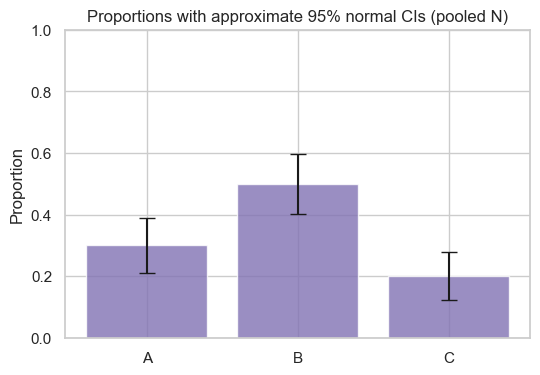

In [32]:
# Example 3: Error bars for proportions (normal approximation)
# Suppose we observed counts and want to plot proportions with 95% approximate normal CI:
categories = ['A', 'B', 'C']
observed = np.array([30, 50, 20])
n_total = observed.sum()
props = observed / n_total
# Standard error for proportion p is sqrt(p*(1-p)/N) where N is group-specific sample size.
# If counts come from the same total N (multinomial), for a quick approximate CI we use N = n_total.
ses_props = np.sqrt(props * (1 - props) / n_total)
z = 1.96  # ~95% CI
lower = props - z * ses_props
upper = props + z * ses_props

fig3, ax3 = plt.subplots(1, 1, figsize=(6, 4))
x = np.arange(len(categories))
ax3.bar(x, props, yerr=z*ses_props, capsize=6, color='C4', alpha=0.8)
ax3.set_xticks(x)
ax3.set_xticklabels(categories)
ax3.set_ylim(0, 1)
ax3.set_ylabel('Proportion')
ax3.set_title('Proportions with approximate 95% normal CIs (pooled N)')

# Summary printout for clarity
print("Counts (A,B,C):", counts)
print("Poisson SEs:", ses)
print("Proportions example observed:", observed, "→ props:", np.round(props, 3))
print("Proportion SEs:", np.round(ses_props, 4))
print("Proportion 95% CI lower/upper (approx):")
for cat, lo, up in zip(categories, lower, upper):
    print(f"  {cat}: {max(lo,0):.3f} → {min(up,1):.3f}")

plt.show()

## Kernel density plots: sns.histplot( … kde = True)​ - kernel function, bandwidth (smoothing parameter), bias-variance tradeoff

## Swarm: sns.swarmplot( … )​ - jittering, point aggregation / overplotting, categorical axis / grouping variable

## Violin: sns.violinplot( … )​ - area proportional vs. max width scaling

## Box plot: sns.boxplot( … ) or df.boxplot( … )​ - interquartile range, five number summary, whisker rule

## Definitions

1. Kernel density plots: like a histogram, but smoothed.
2. Swarm plot: like a kernel density plot turned on its side, but showing each individual data point.
3. Violin plot: Like a kernel density plot turned on its side.
4. Box plot: Shows the 25th and 75th quantiles as well as outliers.

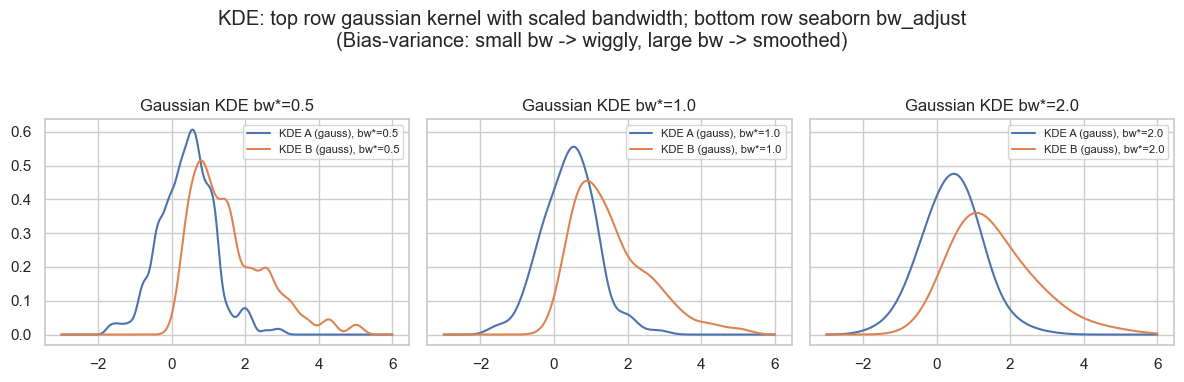

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

sns.set(style="whitegrid", rc={"figure.dpi": 100})

# ---------------------------
# Generate example data (same base data used in multiple plots)
# ---------------------------
rng = np.random.default_rng(1)
# Two groups, somewhat different shapes
group_A = rng.normal(loc=0.5, scale=0.8, size=300)   # more spread
group_B = rng.gamma(shape=2.0, scale=0.8, size=300)  # skewed to the right

# Put into a DataFrame for seaborn convenience
df = pd.DataFrame({
    "value": np.concatenate([group_A, group_B]),
    "group": ["A"] * len(group_A) + ["B"] * len(group_B)
})

# Helper: compute quartiles and whisker endpoints under Tukey rule
def five_number_and_whiskers(arr):
    q1 = np.percentile(arr, 25)
    q2 = np.percentile(arr, 50)
    q3 = np.percentile(arr, 75)
    iqr = q3 - q1
    lower_whisker = q1 - 1.5 * iqr
    upper_whisker = q3 + 1.5 * iqr
    # actual whisker positions are the most extreme non-outlier values
    non_outliers = arr[(arr >= lower_whisker) & (arr <= upper_whisker)]
    if len(non_outliers) > 0:
        actual_lower = non_outliers.min()
        actual_upper = non_outliers.max()
    else:
        actual_lower, actual_upper = q1, q3
    return {
        "q1": q1, "median": q2, "q3": q3, "iqr": iqr,
        "whisker_lower_rule": lower_whisker, "whisker_upper_rule": upper_whisker,
        "whisker_lower_actual": actual_lower, "whisker_upper_actual": actual_upper
    }

stats_A = five_number_and_whiskers(group_A)
stats_B = five_number_and_whiskers(group_B)

# ---------------------------
# 1) KDEs: different kernels and bandwidths
# Comments: bandwidth trades bias vs variance. Small bw -> low bias but high variance (wiggly).
# Large bw -> smoother (lower variance) but may smooth out real features (higher bias).
# ---------------------------
fig_kde, axes_kde = plt.subplots(1, 3, figsize=(12, 4), sharex=True, sharey=True)
kernels = ['gau', 'tophat', 'epa']  # scipy.stats.gaussian_kde uses Gaussian; seaborn's kdeplot 'kernel' param uses names like 'gau' in older versions;
# seaborn kdeplot in modern versions accepts 'kernel' via backend='scipy' or use seaborn.histplot(kde=True) with 'bw_adjust'.
# We'll illustrate by using scipy.stats.gaussian_kde for gaussian kernel with different bw, and seaborn kdeplot with bw_adjust for "effective bw".
xs = np.linspace(-3, 6, 500)

# Gaussian kernel (scipy) with different bandwidth factors
base_kde_A = stats.gaussian_kde(group_A)
base_kde_B = stats.gaussian_kde(group_B)
# gaussian_kde has factor attribute; we can scale it to mimic different bandwidths
bw_factors = [0.5, 1.0, 2.0]  # smaller -> less smoothing, larger -> more smoothing
for col, bwf in enumerate(bw_factors):
    # scale the bandwidth (kde.factor is multiplicative on Scott/other rule)
    kdeA = stats.gaussian_kde(group_A)
    kdeB = stats.gaussian_kde(group_B)
    kdeA.set_bandwidth(bw_method=kdeA.factor * bwf)
    kdeB.set_bandwidth(bw_method=kdeB.factor * bwf)
    axes_kde[col].plot(xs, kdeA(xs), label=f'KDE A (gauss), bw*={bwf}')
    axes_kde[col].plot(xs, kdeB(xs), label=f'KDE B (gauss), bw*={bwf}')
    axes_kde[col].legend(fontsize=8)
    axes_kde[col].set_title(f'Gaussian KDE bw*={bwf}')

# seaborn / SciPy: show other kernel shapes via seaborn.histplot with kde=True (backend internal)
# Note: seaborn's direct kernel choice support is limited depending on versions; we'll show bandwidth adjustment differences instead.
#bw_adjusts = [0.5, 1.0, 2.0]
#for col, bwa in enumerate(bw_adjusts):
#    sns.kdeplot(data=df, x="value", hue="group", bw_adjust=bwa, ax=axes_kde[1, col])
#    axes_kde[1, col].set_title(f'sns.kdeplot bw_adjust={bwa}')
#    axes_kde[1, col].legend(title='group', fontsize=8)

fig_kde.suptitle("KDE: top row gaussian kernel with scaled bandwidth; bottom row seaborn bw_adjust\n(Bias-variance: small bw -> wiggly, large bw -> smoothed)")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

## Why use KDE plots instead of histograms?

1. Histograms depend on where you put bin boundaries. Shift the bins slightly and the bars can look different. KDEs/violins don’t use hard bins, so they don’t produce those sudden jumps when a few points fall on one side of a boundary.

2. Smoother view of shape.  KDE smooths each data point into a little bump and adds them up, producing a continuous curve that highlights the overall shape (peaks and valleys) more clearly than a noisy histogram.

3. Easier to compare groups, due to smoother view of shape.

4. Better visual for smaller samples.  With limited data, histograms can look erratic depending on binning. KDE with an appropriate smoothing (bandwidth) often gives a clearer impression of where the mass is concentrated.  Bandwidth choice matters.

When you might still prefer a histogram or bar chart

1. You want to show actual counts or frequencies.

2. The audience doesn't understand KDE plots and will spend some of their cognitive load trying to figure out what it means.

3. Data are discrete or categorical (use bar charts instead).

4. You want to make the visualization quickly and don’t want to worry about bandwidth choices.

KDE comments:
- Kernel density estimation places a small kernel at each data point and sums them.
- Bandwidth controls smoothing: small bandwidth -> low bias but high variance (wiggly).
- Large bandwidth -> smoother estimate, can hide features (higher bias).

Swarm comments:
- Swarmplot arranges points to avoid overplotting (packing). stripplot with jitter=False shows overlap.

Violin & Box comments:
- Violin scale='area': area of each violin proportional to group sample size (or mass).
- Violin scale='width': each violin scaled so max width is the same across groups (emphasizes shape).
- Boxplot whisker rule shown: by default whis=1.5 uses Tukey rule: whiskers extend to the most extreme points within [Q1 - 1.5*IQR, Q3 + 1.5*IQR]; points outside are flagged as outliers.

Example computed summaries (Tukey):
Group A: {'q1': -0.059, 'median': 0.454, 'q3': 0.879, 'iqr': 0.938, 'whisker_lower_rule': -1.467, 'whisker_upper_rule': 2.286, 'whisker_lower_actual': -1.466, 'whisker_upper_actual':

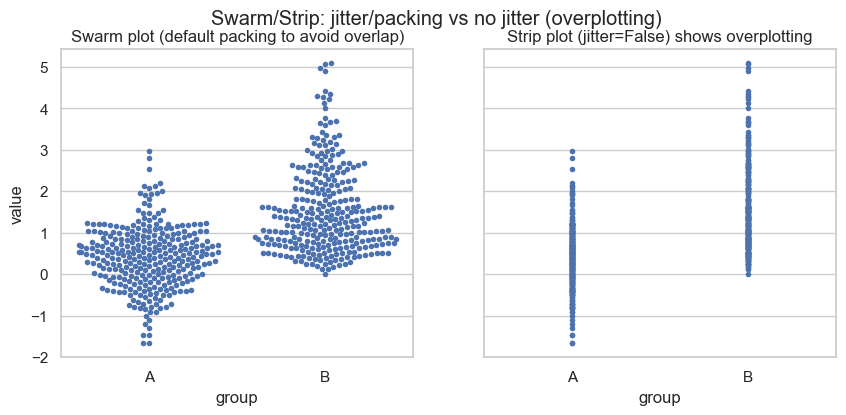

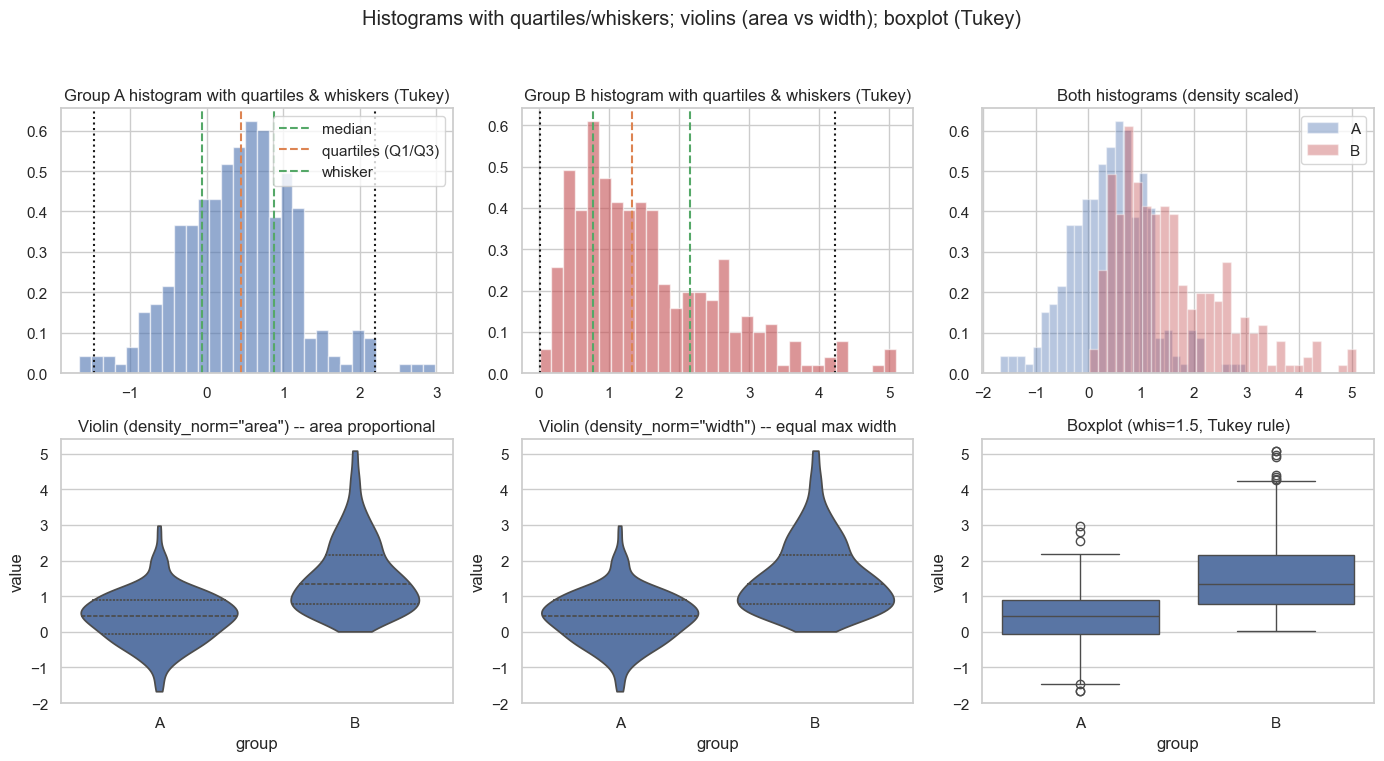

In [34]:

# ---------------------------
# 2) Swarm plots: jittering on/off; show multiple groups
# Comments: jittering (or 'dodge' packing) prevents overplotting; turning it off shows overplotting when many duplicates.
# ---------------------------
fig_swarm, axes_swarm = plt.subplots(1, 2, figsize=(10, 4), sharey=True)
# Left: swarmplot with jitter (default) - seaborn's swarmplot arranges points to avoid overlap
sns.swarmplot(x="group", y="value", data=df, ax=axes_swarm[0], size=4)
axes_swarm[0].set_title("Swarm plot (default packing to avoid overlap)")

# Right: stripplot (no dodge jitter in x direction) to simulate "jitter off" (points overlap)
# seaborn.stripplot has jitter parameter; set jitter=False to show overlap
sns.stripplot(x="group", y="value", data=df, ax=axes_swarm[1], size=4, jitter=False)
axes_swarm[1].set_title("Strip plot (jitter=False) shows overplotting")

fig_swarm.suptitle("Swarm/Strip: jitter/packing vs no jitter (overplotting)")

# ---------------------------
# 3) Violin & Box plots with histogram overlay showing quartiles and whiskers
# - Show both area-proportional and max-width (scale='area' vs scale='width' in seaborn)
# - On a histogram of each group, draw vertical lines at Q1, median, Q3 and whisker endpoints (Tukey rule)
# ---------------------------

fig_vb, axes_vb = plt.subplots(2, 3, figsize=(14, 8))
# Left column: hist + quartile/whisker for A
ax = axes_vb[0, 0]
ax.hist(group_A, bins=30, density=True, alpha=0.6, color='C0')
# vertical lines at quartiles and median
for name in ["q1", "median", "q3"]:
    ax.axvline(stats_A[name], color='C1' if name == 'median' else 'C2', linestyle='--', label=name if name == 'median' else None)
ax.axvline(stats_A['whisker_lower_actual'], color='k', linestyle=':', label='whisker actual')
ax.axvline(stats_A['whisker_upper_actual'], color='k', linestyle=':', label='_nolegend_')
ax.set_title('Group A histogram with quartiles & whiskers (Tukey)')
ax.legend(['median', 'quartiles (Q1/Q3)', 'whisker'])

# Middle column: same for B
ax = axes_vb[0, 1]
ax.hist(group_B, bins=30, density=True, alpha=0.6, color='C3')
for name in ["q1", "median", "q3"]:
    ax.axvline(stats_B[name], color='C1' if name == 'median' else 'C2', linestyle='--')
ax.axvline(stats_B['whisker_lower_actual'], color='k', linestyle=':')
ax.axvline(stats_B['whisker_upper_actual'], color='k', linestyle=':')
ax.set_title('Group B histogram with quartiles & whiskers (Tukey)')

# Right column: show both histograms together (for contrast)
ax = axes_vb[0, 2]
ax.hist(group_A, bins=30, density=True, alpha=0.4, color='C0', label='A')
ax.hist(group_B, bins=30, density=True, alpha=0.4, color='C3', label='B')
ax.set_title('Both histograms (density scaled)')
ax.legend()

# Bottom row: violin (area-proportional) / violin (max-width) / boxplot
# seaborn violinplot scale parameter: 'area' or 'width' or 'count' depending on version; use scale argument
# Left bottom: violin area-proportional
ax = axes_vb[1, 0]
sns.violinplot(x="group", y="value", data=df, density_norm='area', inner='quartile', ax=ax, cut=0)
ax.set_title('Violin (density_norm="area") -- area proportional')

# Middle bottom: violin max-width (scale='width')
ax = axes_vb[1, 1]
sns.violinplot(x="group", y="value", data=df, density_norm='width', inner='quartile', ax=ax, cut=0)
ax.set_title('Violin (density_norm="width") -- equal max width')

# Right bottom: boxplot with whisker rule displayed
ax = axes_vb[1, 2]
sns.boxplot(x="group", y="value", data=df, whis=1.5, ax=ax)  # whis=1.5 -> Tukey default
ax.set_title('Boxplot (whis=1.5, Tukey rule)')

fig_vb.suptitle("Histograms with quartiles/whiskers; violins (area vs width); boxplot (Tukey)", y=0.98)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# ---------------------------
# Comments printed for clarity:
# ---------------------------
print("KDE comments:")
print("- Kernel density estimation places a small kernel at each data point and sums them.")
print("- Bandwidth controls smoothing: small bandwidth -> low bias but high variance (wiggly).")
print("- Large bandwidth -> smoother estimate, can hide features (higher bias).")
print()
print("Swarm comments:")
print("- Swarmplot arranges points to avoid overplotting (packing). stripplot with jitter=False shows overlap.")
print()
print("Violin & Box comments:")
print("- Violin scale='area': area of each violin proportional to group sample size (or mass).")
print("- Violin scale='width': each violin scaled so max width is the same across groups (emphasizes shape).")
print("- Boxplot whisker rule shown: by default whis=1.5 uses Tukey rule: whiskers extend to the most extreme points within [Q1 - 1.5*IQR, Q3 + 1.5*IQR]; points outside are flagged as outliers.")
print()
print("Example computed summaries (Tukey):")
print("Group A:", {k: round(v, 3) for k,v in stats_A.items()})
print("Group B:", {k: round(v, 3) for k,v in stats_B.items()})

plt.show()

# Fill Out Survey

# Manipulating datetimes and using groupby

In [35]:
import pandas as pd
import pandas.compat
import numpy as np
import io

# Option A: Use a small example constructed here with datetimes and a category column
csv = """id,category,ts,value
1,A,2021-01-05 08:15:00,10
2,A,2021-02-10 12:30:00,12
3,B,2021-01-20 09:45:00,7
4,B,2021-03-01 17:00:00,15
5,C,2021-02-28 06:20:00,9
6,C,2021-03-05 13:10:00,11
7,A,2021-03-20 19:05:00,8
8,B,2021-02-14 14:50:00,6
"""
df = pd.read_csv(io.StringIO(csv))  # or use io.StringIO
# Ensure ts is datetime
df['ts'] = pd.to_datetime(df['ts'])

print("Data:")
print(df)

Data:
   id category                  ts  value
0   1        A 2021-01-05 08:15:00     10
1   2        A 2021-02-10 12:30:00     12
2   3        B 2021-01-20 09:45:00      7
3   4        B 2021-03-01 17:00:00     15
4   5        C 2021-02-28 06:20:00      9
5   6        C 2021-03-05 13:10:00     11
6   7        A 2021-03-20 19:05:00      8
7   8        B 2021-02-14 14:50:00      6


In [36]:
# 1) Overall min, max, mean datetime
min_ts = df['ts'].min()
max_ts = df['ts'].max()

# mean: convert to integer nanoseconds, take mean, convert back
mean_ts = pd.to_datetime(df['ts'].astype('int64').mean())

print("\nOverall datetime summary:")
print("min:", min_ts)
print("max:", max_ts)
print("mean (average timestamp):", mean_ts)


Overall datetime summary:
min: 2021-01-05 08:15:00
max: 2021-03-20 19:05:00
mean (average timestamp): 2021-02-16 03:36:52.500000


In [37]:
# 2) Group by categorical column and find min/max/mean datetimes per group
grouped = df.groupby('category')['ts']
agg = grouped.agg(['min', 'max', 'mean']) # lambda x: pd.to_datetime(x.astype('int64').mean())])
agg = agg.rename(columns={'<lambda_0>': 'mean'})
print("\nPer-category datetime summary:")
print(agg)


Per-category datetime summary:
                         min                 max                mean
category                                                            
A        2021-01-05 08:15:00 2021-03-20 19:05:00 2021-02-11 05:16:40
B        2021-01-20 09:45:00 2021-03-01 17:00:00 2021-02-11 05:51:40
C        2021-02-28 06:20:00 2021-03-05 13:10:00 2021-03-02 21:45:00


In [38]:
# --- Alternative: if you have a real dataset with separate year/month/day columns (e.g., seaborn flights),
# you can construct a datetime and then do the same grouping. Example below using seaborn flights:
import seaborn as sns
flights = sns.load_dataset('flights')  # columns: year, month, passengers
# make a datetime (use day=1)
flights['month_dt'] = pd.to_datetime(flights['year'].astype(str) + '-' + flights['month'].astype(str) + '-01')
# Example: find overall min/max/mean and per-year summaries
print("\nflights dataset sample:")
print(flights.head())

print("\nflights month_dt min/max/mean:")
print("min:", flights['month_dt'].min())
print("max:", flights['month_dt'].max())
mean_flights_ts = pd.to_datetime(flights['month_dt'].astype('int64').mean())
print("mean (average month):", mean_flights_ts)


flights dataset sample:
   year month  passengers   month_dt
0  1949   Jan         112 1949-01-01
1  1949   Feb         118 1949-02-01
2  1949   Mar         132 1949-03-01
3  1949   Apr         129 1949-04-01
4  1949   May         121 1949-05-01

flights month_dt min/max/mean:
min: 1949-01-01 00:00:00
max: 1960-12-01 00:00:00
mean (average month): 1954-12-16 05:00:00


In [39]:
# Group by year and get min/max/mean month_dt per year
agg_by_year = flights.groupby('year')['month_dt'].agg(['min', 'max', lambda x: pd.to_datetime(x.astype('int64').mean())])
agg_by_year = agg_by_year.rename(columns={'<lambda_0>': 'mean'})
print("\nPer-year month_dt summary (flights):")
print(agg_by_year.head())


Per-year month_dt summary (flights):
            min        max                mean
year                                          
1949 1949-01-01 1949-12-01 1949-06-16 12:00:00
1950 1950-01-01 1950-12-01 1950-06-16 12:00:00
1951 1951-01-01 1951-12-01 1951-06-16 12:00:00
1952 1952-01-01 1952-12-01 1952-06-16 08:00:00
1953 1953-01-01 1953-12-01 1953-06-16 12:00:00


Who is our audience?

What do they need to know / what do they want to do?

How will our data prove it?

## Using data from last time

In [40]:
import random
import pandas as pd
from datetime import datetime
from datetime import timedelta
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
numrows = 100
np.random.seed(0)
random.seed(0)
df_groceries = pd.DataFrame({})
df_groceries["name"] = [random.choice(["apples_pound", "oranges_pound", "bananas_pound", "milk_gallon", "lettuce"]) for num in range(numrows)]

In [41]:
numrows = 100
df_groceries = pd.DataFrame({})
#df_groceries["name"] = ["apple", "banana", "orange", "milk", "lettuce"]
df_groceries["name"] = [random.choice(["apples_pound", "bananas_pound", "oranges_pound", "milk_gallon", "lettuce"]) for x in range(numrows)]

In [42]:
def choose_unit_price(name):
    if(name == "apples_pound"):
        return random.uniform(1.00, 2.00)
    elif(name == "oranges_pound"):
        return random.uniform(2.00, 4.00)
    elif(name == "bananas_pound"):
        return random.uniform(1.00, 2.00)
    elif(name == "milk_gallon"):
        return random.uniform(3.00, 5.00)
    elif(name == "lettuce"):
        return random.uniform(1.50, 2.50)

In [43]:
df_groceries["unit_price"] = df_groceries["name"].apply(choose_unit_price)
df_groceries["quantity"] = [random.randint(1, 5) for num in range(numrows)]

In [44]:
start = datetime(2020, 1, 1)
end = datetime(2025, 1, 1)
numdays = (end - start).days
random_days = np.random.randint(0, numdays, size = numrows)
df_groceries["date_purchased"] = start + pd.to_timedelta(random_days, unit='D')
df_groceries["state"] = [random.choice(["NY", "MA", "CA"]) for num in range(numrows)]

### Possibility 1:

Our audience is a data scientist working at this chain of grocery stores.

They need to focus on which items could benefit from coupons.

How can our data help them?
* Maybe the items with the highest variance in total spending will benefit the most from coupons.
* Because they are a data scientist, they can understand advanced plot types, such as KDE plots.

In [45]:
df_total_spending = df_groceries.copy()
df_total_spending["total_spending"] = df_total_spending["unit_price"] * df_total_spending["quantity"]
df_total_spending.groupby("name")["total_spending"].var().idxmax()

'milk_gallon'

Text(0.5, 1.0, 'milk_gallon has the largest variation in total spending\n and might be best for coupons')

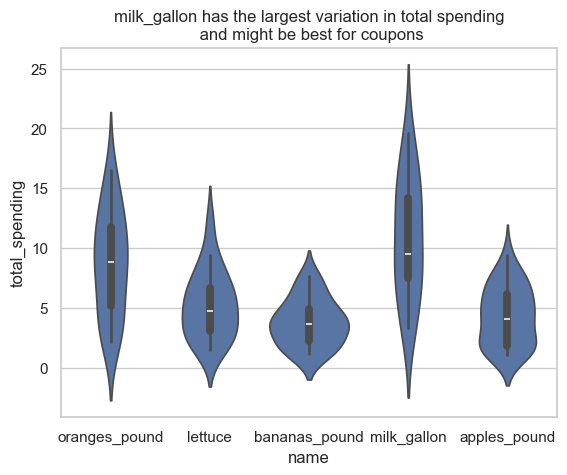

In [46]:
df_total_spending = df_groceries.copy()
df_total_spending["total_spending"] = df_total_spending["unit_price"] * df_total_spending["quantity"]
df_total_spending.groupby("name")["total_spending"].var().idxmax()
name = df_total_spending.groupby("name")["total_spending"].var().idxmax()
sns.violinplot(data = df_total_spending, x = "name", y = "total_spending").set_title(f"{name} has the largest variation in total spending\n and might be best for coupons")

### Possibility 2:

Our audience is a manager at this chain of grocery stores.

They want to compare sales in different states, so that they can petition their corporate office for more resources to match their needs.

How can our data help them?
* Perhaps they would like to see the total sales for each product name
* This would be a bar chart and would not require any special expertise to understand.
* We already made this graph

In [47]:
dfcopy = df_groceries.copy()
dfg = dfcopy.groupby(["name", "state"])["quantity"].sum()
dfg_reset = dfg.reset_index()
df_pivot = dfg_reset.pivot_table(index='name', columns='state', values='quantity', aggfunc='sum', fill_value=0)
df_pivot.reset_index(inplace = True)

Text(0.5, 1.0, 'Total sales (in dollars) from each state and each product')

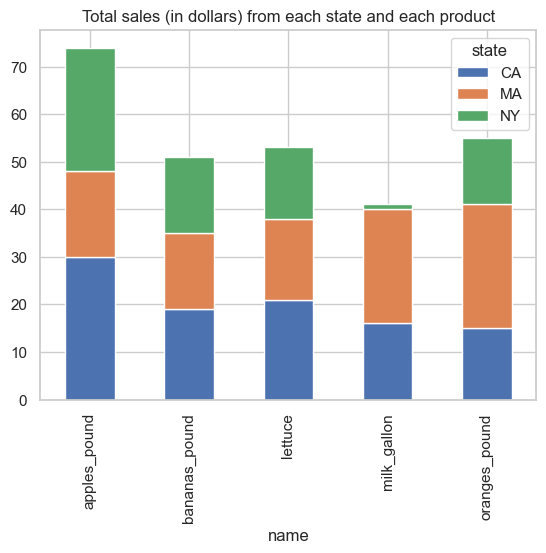

In [48]:
df_pivot.plot.bar(x = "name", stacked = True).set_title("Total sales (in dollars) from each state and each product")

### Problem

The manager cannot easily compare the stacked bar heights.
Let's try putting them in parallel instead.

Text(0.5, 1.0, 'Total sales (in dollars) from each state')

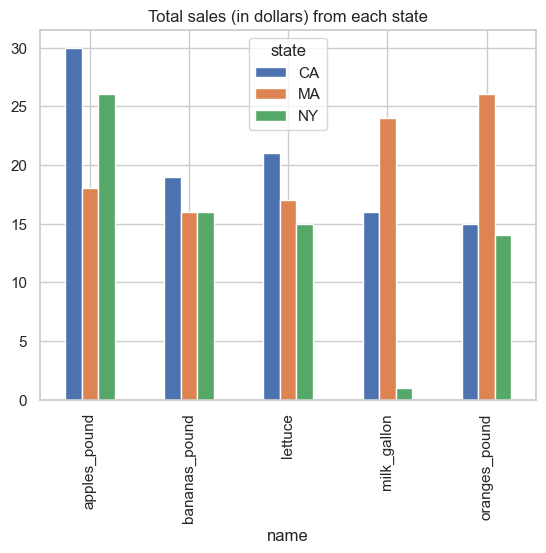

In [49]:
df_pivot.plot.bar(x = "name", stacked = False).set_title("Total sales (in dollars) from each state")